In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
train=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/mitbih_train.csv", header=None)
test=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/mitbih_test.csv", header=None)

In [3]:
#Finding the outliers
continous_features =   train[187].unique()
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            train.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(train[continous_features])

For the feature 0, No of Outliers is 12161
For the feature 1, No of Outliers is 5575
For the feature 2, No of Outliers is 0
For the feature 3, No of Outliers is 1786
For the feature 4, No of Outliers is 6596


In [4]:
#Removing the outliers
outliers(train[continous_features], drop=True)

Outliers from 0 feature removed
Outliers from 1 feature removed
Outliers from 2 feature removed
Outliers from 3 feature removed
Outliers from 4 feature removed


In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import random
import matplotlib.pyplot as plt
import seaborn as sns
train_lbl0 = resample(train[train[187]==0], replace=True, n_samples=15000, random_state=113)
train_lbl1 = resample(train[train[187]==1], replace=True, n_samples=15000, random_state=113)
train_lbl2 = resample(train[train[187]==2], replace=True, n_samples=15000, random_state=113)
train_lbl3 = resample(train[train[187]==3], replace=True, n_samples=15000, random_state=113)
train_lbl4 = resample(train[train[187]==4], replace=True, n_samples=15000, random_state=113)

In [6]:
train= pd.concat([train_lbl0, train_lbl1, train_lbl2, train_lbl3, train_lbl4])

labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
0    15000
1    15000
2    15000
3    15000
4    15000
Name: 187, dtype: int64


In [7]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std
from numpy import mean

In [8]:
x_train = train.iloc[:, 1:-1].values
y_train = train.iloc[:, -1].values

In [9]:
x_test = test.iloc[:, 1:-1].values
y_test = test.iloc[:, -1].values

In [10]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [11]:
param = {
'max_depth': 5, # the maximum depth of each tree
'eta': 0.3, # the training step for each iteration
'silent': 1, # logging mode - quiet
'objective': 'multi:softprob', # error evaluation for multiclass training
'num_class': 5} # the number of classes that exist in this datset
num_round = 200 # the number of training iterations


In [12]:
bst = xgb.train(param, dtrain, num_round)

In [13]:
# make prediction
preds = bst.predict(dtest)
preds_rounded = np.argmax(preds, axis=1)
print(accuracy_score(y_test, preds_rounded))

0.9354101955052074


LEARNING CURVE

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [18]:
# fit model on training data
model = XGBClassifier()
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set,verbose=True)

[0]	validation_0-merror:0.2292	validation_0-mlogloss:1.47519	validation_1-merror:0.448703	validation_1-mlogloss:1.53219
[1]	validation_0-merror:0.21592	validation_0-mlogloss:1.36648	validation_1-merror:0.444866	validation_1-mlogloss:1.46807
[2]	validation_0-merror:0.2078	validation_0-mlogloss:1.275	validation_1-merror:0.427508	validation_1-mlogloss:1.41116
[3]	validation_0-merror:0.199067	validation_0-mlogloss:1.19281	validation_1-merror:0.433446	validation_1-mlogloss:1.35483
[4]	validation_0-merror:0.199347	validation_0-mlogloss:1.12248	validation_1-merror:0.432898	validation_1-mlogloss:1.31245
[5]	validation_0-merror:0.194573	validation_0-mlogloss:1.05956	validation_1-merror:0.427462	validation_1-mlogloss:1.26936
[6]	validation_0-merror:0.191373	validation_0-mlogloss:1.00414	validation_1-merror:0.407363	validation_1-mlogloss:1.23334
[7]	validation_0-merror:0.18776	validation_0-mlogloss:0.95559	validation_1-merror:0.406313	validation_1-mlogloss:1.2029
[8]	validation_0-merror:0.188987	

XGBClassifier(objective='multi:softprob')

In [19]:
# make predictions for test data
predictions = model.predict(x_test)

In [20]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

In [22]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

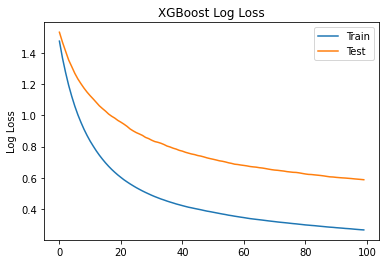

In [24]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

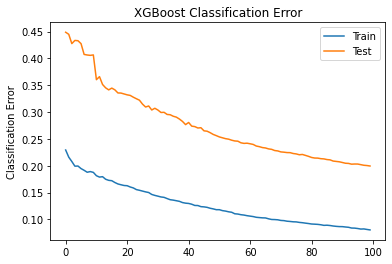

In [26]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()